In [2]:
import pandas as pd
import pylab as plt
import numpy as np
import jax
import jax.numpy as jnp

# Read in the data

In [3]:
movies = pd.read_csv('/Users/suningquek/Documents/Y3S2/DSA4212/Datasets/ml-1m/movies.dat', header = None, sep='::', engine = 'python', encoding='ISO-8859-1')

In [4]:
movies.columns = ['MovieID', 'Title', 'Genre']
movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.shape

(3883, 3)

In [6]:
users = pd.read_csv('/Users/suningquek/Documents/Y3S2/DSA4212/Datasets/ml-1m/users.dat', header = None, sep='::', engine = 'python', encoding='ISO-8859-1')

In [7]:
users.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zipcode']
users.head()

,UserID,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
users.shape

(6040, 5)

In [9]:
ratings = pd.read_csv('/Users/suningquek/Documents/Y3S2/DSA4212/Datasets/ml-1m/ratings.dat', header = None, sep='::', engine = 'python', encoding='ISO-8859-1')

In [10]:
ratings.columns = ['UserID', 'MovieID', 'Ratings', 'Timestamp'] # what is timestamp about?
ratings.head()

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
ratings.shape

(1000209, 4)

In [12]:
ratings['UserID'].min(), ratings['UserID'].max()
ratings['MovieID'].min(), ratings['MovieID'].max()

(1, 3952)

In [13]:
ratings['Ratings'].unique()

array([5, 3, 4, 2, 1])

In [14]:
type(ratings.loc[0, 'MovieID'])

numpy.int64

# Split data into train and test sets

In [15]:
 # random training set containing 90% of available ratings
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(ratings, test_size=0.1, random_state=1)

In [16]:
len(training_data), len(testing_data)

(900188, 100021)

In [17]:
training_data = training_data.reset_index()
training_data.head()

,index,UserID,MovieID,Ratings,Timestamp
0,316448,1883,2020,3,974876148
1,82748,549,930,5,976116072
2,215642,1306,3510,3,1015051441
3,148022,953,3911,5,975265409
4,522854,3224,2599,4,968520931


In [18]:
testing_data = testing_data.reset_index()
testing_data.head()

,index,UserID,MovieID,Ratings,Timestamp
0,630120,3809,2924,4,965962574
1,229398,1389,1957,4,994393608
2,758377,4510,1479,2,966788084
3,159240,1017,3840,3,975012700
4,254252,1546,1422,3,979097900


In [19]:
training_data.shape, testing_data.shape

((900188, 5), (100021, 5))

## Convert training data into users (rows) and movies (columns) matrix with entries = ratings

In [20]:
users.shape[0], movies.shape[0]

(6040, 3883)

In [21]:
u_list = []
m_list = []
train_ratings = pd.DataFrame(np.full((users.shape[0], 3952), 0)) #movies.shape[0]
train_ratings.shape

(6040, 3952)

In [22]:
for i in range(len(training_data)):
    u = training_data.loc[i, 'UserID']
    u_list.append(u)
    m = training_data.loc[i, 'MovieID']
    m_list.append(m)
    r = training_data.loc[i, 'Ratings']
    train_ratings.loc[u - 1, m - 1] = r

In [23]:
train_ratings = train_ratings.to_numpy()

In [24]:
train_ratings

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]])

In [25]:
u_list = np.array(u_list) - 1
m_list = np.array(m_list) - 1
# User list and movie list need to - 1 because we want index to start from 0
# Initially, user list range btw 1 and 6040, want users to have index 0, ... 6039 (first row - first user ...)
# Initially, movie list range btw 1 and 3952, want movies to have index 0, ... 3951 (first col - first movie ...)

In [26]:
m_list.min(), m_list.max()

(0, 3951)

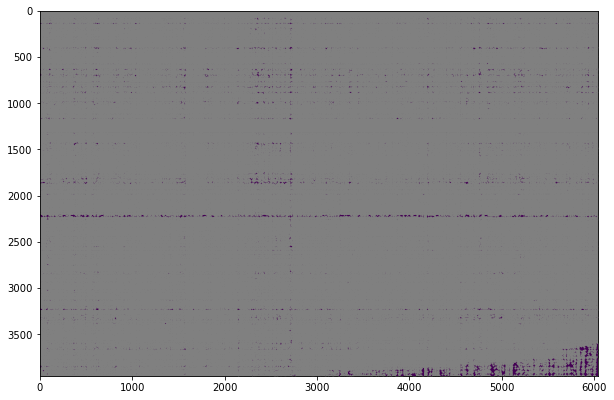

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(train_ratings.T) # train_ratings - rows (Y) are users, columns (X) are movies
plt.scatter(u_list, m_list, color="grey", s=1)

## Convert test data into users (rows) and movies (columns) matrix with entries = ratings

In [27]:
test_u = []
test_m = []
test_ratings = pd.DataFrame(np.full((users.shape[0], 3952), 0)) #movies.shape[0]
test_ratings.shape

(6040, 3952)

In [28]:
for i in range(len(testing_data)):
    u = testing_data.loc[i, 'UserID']
    test_u.append(u)
    m = testing_data.loc[i, 'MovieID']
    test_m.append(m)
    r = testing_data.loc[i, 'Ratings']
    test_ratings.loc[u - 1, m - 1] = r

In [29]:
test_ratings=test_ratings.to_numpy()

In [30]:
test_u = np.array(test_u) - 1
test_m = np.array(test_m) - 1
# User list and movie list need to - 1 because we want index to start from 0

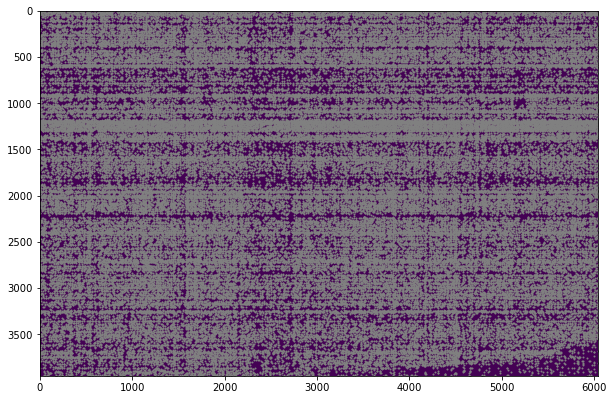

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(test_ratings.T) # test - rows (Y) are users, columns (X) are movies
plt.scatter(test_u, test_m, color="grey", s=1)

# Split training data into train and validation sets

In [31]:
# randomly sample 20% of the training set (available ratings) to be the validation set to tune hyperparameters
training_data_r, validation_data_r = train_test_split(training_data, test_size=0.2, random_state=1)

In [32]:
len(training_data_r), len(validation_data_r)

(720150, 180038)

In [33]:
training_data_r = training_data_r.reset_index()
validation_data_r = validation_data_r.reset_index()

In [34]:
u_list_train_r = []
m_list_train_r = []
train_ratings_r = pd.DataFrame(np.full((users.shape[0], 3952), 0)) #movies.shape[0]
train_ratings_r.shape

(6040, 3952)

In [35]:
for i in range(len(training_data_r)):
    u = training_data_r.loc[i, 'UserID']
    u_list_train_r.append(u)
    m = training_data_r.loc[i, 'MovieID']
    m_list_train_r.append(m)
    r = training_data_r.loc[i, 'Ratings']
    train_ratings_r.loc[u - 1, m - 1] = r

In [36]:
train_ratings_r = train_ratings_r.to_numpy()
u_list_train_r = np.array(u_list_train_r) - 1
m_list_train_r = np.array(m_list_train_r) - 1

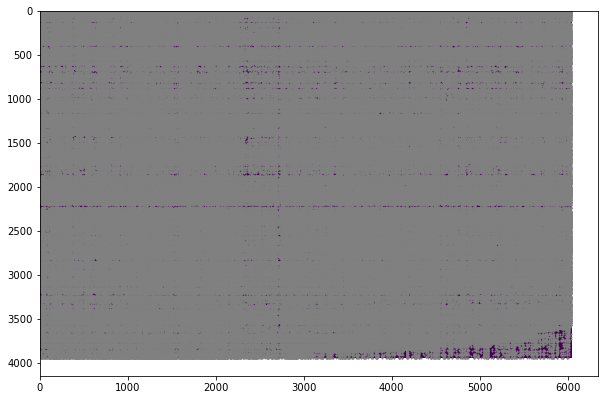

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(train_ratings_r.T) # train_ratings - rows (Y) are users, columns (X) are movies
plt.scatter(u_list_train_r, m_list_train_r, color="grey", s=1)

In [37]:
u_list_val_r = []
m_list_val_r = []
val_ratings_r = pd.DataFrame(np.full((users.shape[0], 3952), 0)) #movies.shape[0]
val_ratings_r.shape

(6040, 3952)

In [38]:
for i in range(len(validation_data_r)):
    u = validation_data_r.loc[i, 'UserID']
    u_list_val_r.append(u)
    m = validation_data_r.loc[i, 'MovieID']
    m_list_val_r.append(m)
    r = validation_data_r.loc[i, 'Ratings']
    val_ratings_r.loc[u - 1, m - 1] = r

In [39]:
val_ratings_r = val_ratings_r.to_numpy()
u_list_val_r = np.array(u_list_val_r) - 1
m_list_val_r = np.array(m_list_val_r) - 1

# Alternated Minimization

In [40]:
@jax.jit
def MSE(U, V):
    predictions = U @ V
    errors = (train_ratings - predictions)[u_list.astype(int), m_list.astype(int)] # only take the entries that are rated to calculate MSE
    return jnp.mean(errors**2)

MSE_grad_u_main = jax.jit( jax.grad(MSE, argnums=0) )
MSE_grad_v_main = jax.jit( jax.grad(MSE, argnums=1) )

def MSE_test(U, V):
    predictions = U @ V 
    errors = (test_ratings - predictions)[test_u.astype(int), test_m.astype(int)] # only take the entries that are rated to calculate MSE
    return jnp.mean(errors**2)

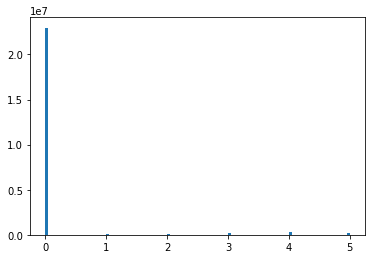

In [42]:
_ = plt.hist(train_ratings.flatten(), bins=100)

In [44]:
p, q = train_ratings.shape
# rank of the "low rank approximation"
r = 10
np.random.seed(1)
U_init = np.random.normal(0,1,size=(p,r))
V_init = np.random.normal(0,1,size=(r,q))

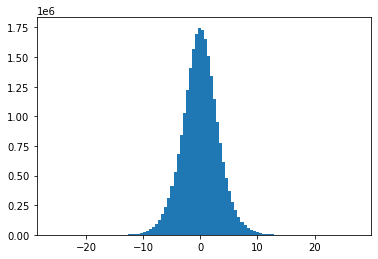

In [45]:
_ = plt.hist( (U_init @ V_init).flatten(), bins=100)

In [33]:
# Fix users U (Wu) and update movies V (Wf)
def optimize_Wf(niter, learning_rate, U, V):
    for k in range(niter):
        grad_v = MSE_grad_v_main(U,V)
        V = V - learning_rate * grad_v
    return V

# Fix movies V (Wf) and update users U (Wu)
def optimize_Wu(niter, learning_rate, U, V):
    for k in range(niter):
        grad_u = MSE_grad_u_main(U,V)
        U = U - learning_rate * grad_u
    return U

In [36]:
U,V = np.copy(U_init), np.copy(V_init)
# sequential update of parameters
niter = 2000
learning_rate = 100
loss_history = []
loss_history_test = []

for _ in range(niter):
    V = optimize_Wf(10, learning_rate, U, V)
    
    U = optimize_Wu(10, learning_rate, U, V)
    
    # check the loss for monitoring purposes
    current_loss = MSE(U,V)
    loss_history.append(current_loss)
    loss_history_test.append(MSE_test(U,V))
    
    if _ % 50 == 0:
        # let us compute the train/validation error rate
        err_train = jnp.sqrt(MSE(U,V))
        err_val= jnp.sqrt(MSE_test(U,V))      
        print(f"iter:{_} \t Loss:{current_loss:2.3f} \t train_RMSE:{err_train:2.3f} \t test_RMSE:{err_val:2.3f}")
        
err_train = jnp.sqrt(MSE(U,V))
err_val= jnp.sqrt(MSE_test(U,V))    
print(f"iter:{_} \t Loss:{current_loss:2.3f} \t train_MSE:{err_train:2.1f} \t test_MSE:{err_val:2.3f}")

iter:0 	 Loss:14.694 	 train_RMSE:3.833 	 test_RMSE:3.892
iter:50 	 Loss:0.750 	 train_RMSE:0.866 	 test_RMSE:0.941
iter:100 	 Loss:0.701 	 train_RMSE:0.837 	 test_RMSE:0.922
iter:150 	 Loss:0.671 	 train_RMSE:0.819 	 test_RMSE:0.913
iter:200 	 Loss:0.650 	 train_RMSE:0.806 	 test_RMSE:0.908
iter:250 	 Loss:0.635 	 train_RMSE:0.797 	 test_RMSE:0.904
iter:300 	 Loss:0.624 	 train_RMSE:0.790 	 test_RMSE:0.902
iter:350 	 Loss:0.616 	 train_RMSE:0.785 	 test_RMSE:0.901
iter:400 	 Loss:0.609 	 train_RMSE:0.780 	 test_RMSE:0.900
iter:450 	 Loss:0.603 	 train_RMSE:0.777 	 test_RMSE:0.899
iter:500 	 Loss:0.599 	 train_RMSE:0.774 	 test_RMSE:0.898
iter:550 	 Loss:0.595 	 train_RMSE:0.771 	 test_RMSE:0.898
iter:600 	 Loss:0.591 	 train_RMSE:0.769 	 test_RMSE:0.898
iter:650 	 Loss:0.589 	 train_RMSE:0.767 	 test_RMSE:0.898
iter:700 	 Loss:0.586 	 train_RMSE:0.766 	 test_RMSE:0.898
iter:750 	 Loss:0.584 	 train_RMSE:0.764 	 test_RMSE:0.898
iter:800 	 Loss:0.582 	 train_RMSE:0.763 	 test_RMSE:0.899

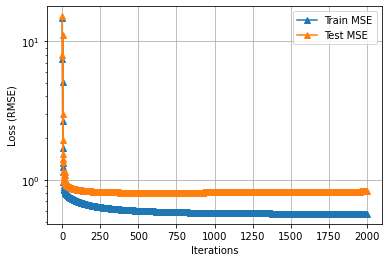

In [43]:
plt.plot(loss_history, "-^", label=f"Train MSE")
plt.plot(loss_history_test, "-^", label=f"Test MSE")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss (RMSE)")
plt.yscale("log")
plt.grid(True)

In [55]:
U_init.shape, V_init.shape

((6040, 10), (10, 3952))

# Tuning of hyperparameters

In [39]:
p, q = train_ratings_r.shape
r = 10 # rank of the "low rank approximation"
np.random.seed(1)
U_init = np.random.normal(0,1,size=(p,r))
V_init = np.random.normal(0,1,size=(r,q))

In [40]:
@jax.jit
def MSE_train_r(U, V):
    predictions = U @ V 
    errors = (train_ratings_r - predictions)[u_list_train_r.astype(int), m_list_train_r.astype(int)] # only take the entries that are rated to calculate MSE
    return jnp.mean(errors**2)

MSE_grad_u = jax.jit( jax.grad(MSE_train_r, argnums=0) )
MSE_grad_v = jax.jit( jax.grad(MSE_train_r, argnums=1) )

def MSE_val_r(U, V):
    predictions = U @ V 
    errors = (val_ratings_r - predictions)[u_list_val_r.astype(int), m_list_val_r.astype(int)] # only take the entries that are rated to calculate MSE
    return jnp.mean(errors**2)

In [41]:
# Fix users U (Wu) and update movies V (Wf)
def optimize_Wf_cv(niter, learning_rate, U, V):
    for k in range(niter):
        grad_v = MSE_grad_v(U,V)
        V = V - learning_rate * grad_v
    return V

# Fix movies V (Wf) and update users U (Wu)
def optimize_Wu_cv(niter, learning_rate, U, V):
    for k in range(niter):
        grad_u = MSE_grad_u(U,V)
        U = U - learning_rate * grad_u
    return U

## Find optimal number of iterations for each GD

In [49]:
def alternated_minimization(i):
    U, V = np.copy(U_init), np.copy(V_init)
    
    niter = 200
    learning_rate = 20
    loss_history_val = []

    for _ in range(niter):
        V = optimize_Wf_cv(i, learning_rate, U, V)

        U = optimize_Wu_cv(i, learning_rate, U, V)

        # check the loss for monitoring purposes
        
        loss_history_val.append(jnp.sqrt(MSE_val_r(U,V)))
        
        if _ % 50 == 0:
            # let us compute the train/validation error rate
            err_train = jnp.sqrt(MSE_train_r(U,V))
            err_val = jnp.sqrt(MSE_val_r(U,V))      
            print(f"iter:{_} \t iter_each_GD:{i} \t train_RMSE:{err_train:2.3f} \t test_RMSE:{err_val:2.3f}")    
    
    err_train = jnp.sqrt(MSE_train_r(U,V))
    err_val = jnp.sqrt(MSE_val_r(U,V))
    
    print("Final Train RMSE: " + str(err_train))
    print("Final Validation RMSE: " + str(err_val))
    return loss_history_val

iter:0 	 iter_each_GD:1 	 train_RMSE:4.775 	 test_RMSE:4.780
iter:50 	 iter_each_GD:1 	 train_RMSE:3.521 	 test_RMSE:3.604
iter:100 	 iter_each_GD:1 	 train_RMSE:1.877 	 test_RMSE:1.981
iter:150 	 iter_each_GD:1 	 train_RMSE:1.376 	 test_RMSE:1.481
Final Train RMSE: 1.182271
Final Validation RMSE: 1.2836747
iter:0 	 iter_each_GD:5 	 train_RMSE:4.500 	 test_RMSE:4.522
iter:50 	 iter_each_GD:5 	 train_RMSE:1.076 	 test_RMSE:1.174
iter:100 	 iter_each_GD:5 	 train_RMSE:0.937 	 test_RMSE:1.025
iter:150 	 iter_each_GD:5 	 train_RMSE:0.907 	 test_RMSE:0.993
Final Train RMSE: 0.8935469
Final Validation RMSE: 0.98032135
iter:0 	 iter_each_GD:10 	 train_RMSE:4.294 	 test_RMSE:4.330
iter:50 	 iter_each_GD:10 	 train_RMSE:0.936 	 test_RMSE:1.024
iter:100 	 iter_each_GD:10 	 train_RMSE:0.893 	 test_RMSE:0.980
iter:150 	 iter_each_GD:10 	 train_RMSE:0.880 	 test_RMSE:0.969
Final Train RMSE: 0.8700611
Final Validation RMSE: 0.963651
iter:0 	 iter_each_GD:20 	 train_RMSE:4.075 	 test_RMSE:4.127
iter:

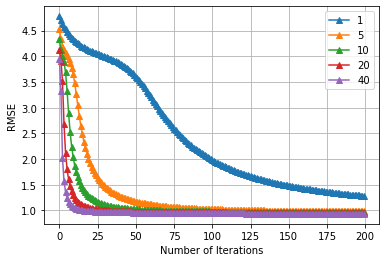

In [50]:
i_range = [1, 5, 10, 20, 40]

min_val_loss_history = []

for i in i_range:
    loss_history_val = alternated_minimization(i)
    
    min_val_loss_history.append(min(loss_history_val))
    
    plt.plot(loss_history_val, "-^",
             label=f"{i}") 

plt.legend()
plt.xlabel("Number of Iterations")
plt.ylabel("RMSE")
plt.grid(True)

## Find optimal number of latent factors, k

In [54]:
def alternated_minimization(r):
    
    p, q = train_ratings_r.shape
    np.random.seed(1)
    U_init = np.random.normal(0,1,size=(p,r))
    V_init = np.random.normal(0,1,size=(r,q))
    U, V = np.copy(U_init), np.copy(V_init)
    
    niter = 200
    num_gd_iter = 10
    learning_rate = 100
    loss_history_val = []

    for _ in range(niter):
        V = optimize_Wf_cv(num_gd_iter, learning_rate, U, V)

        U = optimize_Wu_cv(num_gd_iter, learning_rate, U, V)

        # check the loss for monitoring purposes
        loss_history_val.append(jnp.sqrt(MSE_val_r(U,V)))
        
        if _ % 100 == 0:
            # let us compute the train/validation error rate
            err_train = jnp.sqrt(MSE_train_r(U,V))
            err_val= jnp.sqrt(MSE_val_r(U,V))      
            print(f"iter:{_} \t k:{r} \t train_RMSE:{err_train:2.3f} \t test_RMSE:{err_val:2.3f}")    
    
    err_train = jnp.sqrt(MSE_train_r(U,V))
    err_val = jnp.sqrt(MSE_val_r(U,V))
    
    print("Final Train RMSE: " + str(err_train))
    print("Final Validation RMSE: " + str(err_val))
    return loss_history_val

iter:0 	 k:1 	 train_RMSE:3.756 	 test_RMSE:3.759
iter:100 	 k:1 	 train_RMSE:0.902 	 test_RMSE:0.911
Final Train RMSE: 0.9015277
Final Validation RMSE: 0.91047466
iter:0 	 k:2 	 train_RMSE:3.751 	 test_RMSE:3.763
iter:100 	 k:2 	 train_RMSE:0.921 	 test_RMSE:0.940
Final Train RMSE: 0.9028794
Final Validation RMSE: 0.92345273
iter:0 	 k:3 	 train_RMSE:3.776 	 test_RMSE:3.797
iter:100 	 k:3 	 train_RMSE:0.862 	 test_RMSE:0.895
Final Train RMSE: 0.85030204
Final Validation RMSE: 0.8868874
iter:0 	 k:4 	 train_RMSE:3.761 	 test_RMSE:3.788
iter:100 	 k:4 	 train_RMSE:0.857 	 test_RMSE:0.900
Final Train RMSE: 0.8388602
Final Validation RMSE: 0.888909
iter:0 	 k:5 	 train_RMSE:3.784 	 test_RMSE:3.814
iter:100 	 k:5 	 train_RMSE:0.852 	 test_RMSE:0.905
Final Train RMSE: 0.8311559
Final Validation RMSE: 0.8935725
iter:0 	 k:6 	 train_RMSE:3.811 	 test_RMSE:3.851
iter:100 	 k:6 	 train_RMSE:0.882 	 test_RMSE:0.945
Final Train RMSE: 0.8593778
Final Validation RMSE: 0.93309146
iter:0 	 k:8 	 trai

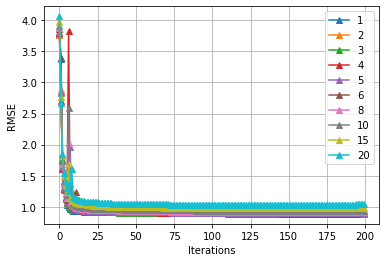

In [55]:
min_val_loss_history = []

for r in [1,2,3,4,5,6,8,10,15,20]:
    loss_history_val = alternated_minimization(r)
    
    min_val_loss_history.append(min(loss_history_val))
    
    plt.plot(loss_history_val, "-^",
             label=f"{r}") 

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.grid(True)

Text(0, 0.5, 'RMSE')

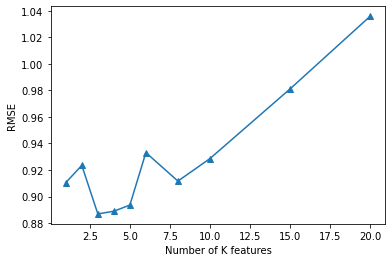

In [56]:
r_range = [1,2,3,4,5,6,8,10,15,20]
plt.plot(r_range, min_val_loss_history, "-^")
plt.xlabel("Number of K features")
plt.ylabel("RMSE")

In [57]:
min_val_loss_history

[DeviceArray(0.91047466, dtype=float32),
 DeviceArray(0.92345273, dtype=float32),
 DeviceArray(0.8868874, dtype=float32),
 DeviceArray(0.888909, dtype=float32),
 DeviceArray(0.8935725, dtype=float32),
 DeviceArray(0.93309146, dtype=float32),
 DeviceArray(0.9116211, dtype=float32),
 DeviceArray(0.9285842, dtype=float32),
 DeviceArray(0.9810517, dtype=float32),
 DeviceArray(1.035817, dtype=float32)]

In [58]:
p, q = train_ratings_r.shape
r = 3 # rank of the "low rank approximation"
np.random.seed(1)
U_init = np.random.normal(0,1,size=(p,r))
V_init = np.random.normal(0,1,size=(r,q))

## Find optimal learning rate

In [60]:
def alternated_minimization(lr):
    U,V = np.copy(U_init), np.copy(V_init)

    niter = 200
    num_gd_iter = 10
    loss_history_val = []

    for _ in range(niter):
        V = optimize_Wf_cv(num_gd_iter, lr, U, V)
        
        U = optimize_Wu_cv(num_gd_iter, lr, U, V)

        # check the loss for monitoring purposes
        loss_history_val.append(jnp.sqrt(MSE_val_r(U,V)))

        if _ % 100 == 0:
            # let us compute the train/validation error rate
            err_train = jnp.sqrt(MSE_train_r(U,V))
            err_val= jnp.sqrt(MSE_val_r(U,V))      
            print(f"iter:{_} \t Learning_Rate:{lr} \t train_RMSE:{err_train:2.3f} \t test_RMSE:{err_val:2.3f}")
    
    err_train = jnp.sqrt(MSE_train_r(U,V))
    err_val= jnp.sqrt(MSE_val_r(U,V))    

    print("Final Train RMSE: " + str(err_train))
    print("Final Validation RMSE: " + str(err_val))
    return loss_history_val

iter:0 	 Learning_Rate:1 	 train_RMSE:4.114 	 test_RMSE:4.119
iter:100 	 Learning_Rate:1 	 train_RMSE:3.735 	 test_RMSE:3.756
Final Train RMSE: 2.1880105
Final Validation RMSE: 2.2220302
iter:0 	 Learning_Rate:10 	 train_RMSE:4.000 	 test_RMSE:4.009
iter:100 	 Learning_Rate:10 	 train_RMSE:0.928 	 test_RMSE:0.950
Final Train RMSE: 0.90090436
Final Validation RMSE: 0.9246636
iter:0 	 Learning_Rate:50 	 train_RMSE:3.834 	 test_RMSE:3.849
iter:100 	 Learning_Rate:50 	 train_RMSE:0.877 	 test_RMSE:0.905
Final Train RMSE: 0.8623508
Final Validation RMSE: 0.8957058
iter:0 	 Learning_Rate:100 	 train_RMSE:3.776 	 test_RMSE:3.797
iter:100 	 Learning_Rate:100 	 train_RMSE:0.862 	 test_RMSE:0.895
Final Train RMSE: 0.85030204
Final Validation RMSE: 0.8868874
iter:0 	 Learning_Rate:150 	 train_RMSE:3.747 	 test_RMSE:3.770
iter:100 	 Learning_Rate:150 	 train_RMSE:nan 	 test_RMSE:nan
Final Train RMSE: nan
Final Validation RMSE: nan


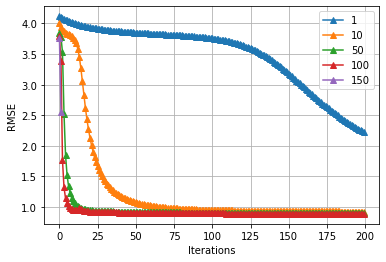

In [61]:
min_val_loss_history = []

for lr in [1, 10, 50, 100, 150]:
    loss_history_val = alternated_minimization(lr)
    
    min_val_loss_history.append(min(loss_history_val))
    
    plt.plot(loss_history_val, "-^",
             label=f"{lr}") 

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.grid(True)

In [63]:
loss_history_val # loss history when learning rate = 150

[DeviceArray(3.769662, dtype=float32),
 DeviceArray(2.5568707, dtype=float32),
 DeviceArray(inf, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 De

In [64]:
min_val_loss_history

[DeviceArray(2.2220302, dtype=float32),
 DeviceArray(0.9246636, dtype=float32),
 DeviceArray(0.8957058, dtype=float32),
 DeviceArray(0.8868874, dtype=float32),
 DeviceArray(2.5568707, dtype=float32)]

## Regularization

In [69]:
n_users = 6040
n_movies = 3952

In [70]:
@jax.jit
def MSE_regularized(U, V, lamb):
    predictions = U @ V 
    errors = (train_ratings_r - predictions)[u_list_train_r.astype(int), m_list_train_r.astype(int)] # only take the entries that are rated to calculate MSE
    return jnp.mean(errors**2) + ((lamb/jnp.abs(n_users))*((jnp.linalg.norm(U))**2)) + ((lamb/jnp.abs(n_movies))*((jnp.linalg.norm(V))**2))

MSE_grad_u_reg = jax.jit( jax.grad(MSE_regularized, argnums=0) )
MSE_grad_v_reg = jax.jit( jax.grad(MSE_regularized, argnums=1) )

In [71]:
# Fix users U (Wu) and update movies V (Wf)
def optimize_Wf_cv(niter, learning_rate, U, V, lamb):
    for k in range(niter):
        grad_v = MSE_grad_v_reg(U,V, lamb)
        V = V - learning_rate * grad_v
    return V

# Fix movies V (Wf) and update users U (Wu)
def optimize_Wu_cv(niter, learning_rate, U, V, lamb):
    for k in range(niter):
        grad_u = MSE_grad_u_reg(U,V, lamb)
        U = U - learning_rate * grad_u
    return U

In [73]:
def alternated_minimization(lamb):
    
    U, V = np.copy(U_init), np.copy(V_init)
    
    niter = 200
    num_gd_iter = 10
    learning_rate = 100
    loss_history_val = []

    for _ in range(niter):
        V = optimize_Wf_cv(num_gd_iter, learning_rate, U, V, lamb)

        U = optimize_Wu_cv(num_gd_iter, learning_rate, U, V, lamb)

        # check the loss for monitoring purposes
        
        loss_history_val.append(jnp.sqrt(MSE_val_r(U,V)))
        
        if _ % 100 == 0:
            # let us compute the train/validation error rate
            err_train = jnp.sqrt(MSE_regularized(U, V, lamb))
            err_val= jnp.sqrt(MSE_val_r(U,V))      
            print(f"iter:{_} \t Lambda:{lamb} \t train_regularized_RMSE:{err_train:2.3f} \t test_RMSE:{err_val:2.3f}")    
    
    err_train = jnp.sqrt(MSE_regularized(U, V, lamb))
    err_val = jnp.sqrt(MSE_val_r(U,V))
    
    print("Final Regularized Train RMSE: " + str(err_train))
    print("Final Validation RMSE: " + str(err_val))
    return loss_history_val

iter:0 	 Lambda:0 	 train_regularized_RMSE:3.776 	 test_RMSE:3.797
iter:100 	 Lambda:0 	 train_regularized_RMSE:0.862 	 test_RMSE:0.895
Final Regularized Train RMSE: 0.85030204
Final Validation RMSE: 0.8868874
iter:0 	 Lambda:0.01 	 train_regularized_RMSE:3.782 	 test_RMSE:3.796
iter:100 	 Lambda:0.01 	 train_regularized_RMSE:0.900 	 test_RMSE:0.888
Final Regularized Train RMSE: 0.88724536
Final Validation RMSE: 0.87841535
iter:0 	 Lambda:0.1 	 train_regularized_RMSE:3.826 	 test_RMSE:3.790
iter:100 	 Lambda:0.1 	 train_regularized_RMSE:1.159 	 test_RMSE:0.898
Final Regularized Train RMSE: 1.1591471
Final Validation RMSE: 0.8976066
iter:0 	 Lambda:0.5 	 train_regularized_RMSE:3.956 	 test_RMSE:3.769
iter:100 	 Lambda:0.5 	 train_regularized_RMSE:1.806 	 test_RMSE:1.104
Final Regularized Train RMSE: 1.806032
Final Validation RMSE: 1.1036805
iter:0 	 Lambda:1 	 train_regularized_RMSE:4.019 	 test_RMSE:3.756
iter:100 	 Lambda:1 	 train_regularized_RMSE:2.254 	 test_RMSE:1.370
Final Regula

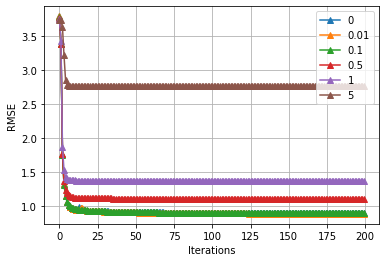

In [75]:
min_val_loss_history = []

for lamb in [0, 0.01, 0.1, 0.5, 1, 5]:
    
    loss_history_val = alternated_minimization(lamb)
    min_val_loss_history.append(min(loss_history_val))
    
    plt.plot(loss_history_val, "-^",
             label=f"{lamb}") 

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.grid(True)

Text(0, 0.5, 'RMSE')

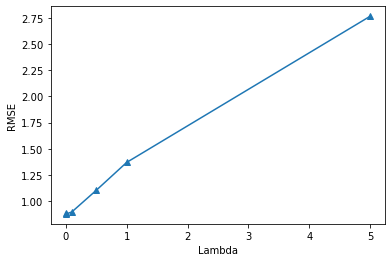

In [82]:
lamb_range = [0, 0.01, 0.1, 0.5, 1, 5]
plt.plot(lamb_range, min_val_loss_history, "-^")
plt.xlabel("Lambda")
plt.ylabel("RMSE")

Text(0, 0.5, 'RMSE')

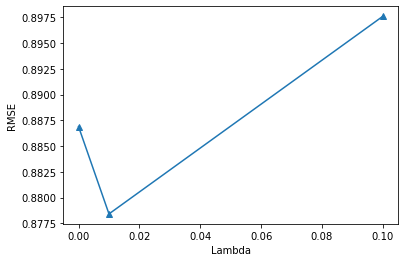

In [83]:
lamb_range = [0, 0.01, 0.1]#, 0.5, 1, 5]
plt.plot(lamb_range, min_val_loss_history[:3], "-^")
plt.xlabel("Lambda")
plt.ylabel("RMSE")

In [84]:
min_val_loss_history

[DeviceArray(0.8868874, dtype=float32),
 DeviceArray(0.87841535, dtype=float32),
 DeviceArray(0.89759624, dtype=float32),
 DeviceArray(1.1036805, dtype=float32),
 DeviceArray(1.3700396, dtype=float32),
 DeviceArray(2.7653255, dtype=float32)]

# Best Alternated Minimization Model

In [46]:
p, q = train_ratings.shape
r = 3
np.random.seed(1)
U_init = np.random.normal(0,1,size=(p,r))
V_init = np.random.normal(0,1,size=(r,q))

In [50]:
n_users = 6040
n_movies = 3952

In [51]:
@jax.jit
def MSE_regularized_final(U, V, lamb):
    predictions = U @ V 
    errors = (train_ratings - predictions)[u_list.astype(int), m_list.astype(int)] # only take the entries that are rated to calculate MSE
    return jnp.mean(errors**2) + ((lamb/jnp.abs(n_users))*((jnp.linalg.norm(U))**2)) + ((lamb/jnp.abs(n_movies))*((jnp.linalg.norm(V))**2))

MSE_grad_u_reg_final = jax.jit( jax.grad(MSE_regularized_final, argnums=0) )
MSE_grad_v_reg_final = jax.jit( jax.grad(MSE_regularized_final, argnums=1) )

def MSE_test(U, V):
    predictions = U @ V 
    errors = (test_ratings - predictions)[test_u.astype(int), test_m.astype(int)] # only take the entries that are rated to calculate MSE
    return jnp.mean(errors**2)

In [52]:
# Fix users U (Wu) and update movies V (Wf)
def optimize_Wf_cv_final(niter, learning_rate, U, V, lamb):
    for k in range(niter):
        grad_v = MSE_grad_v_reg_final(U, V, lamb)
        V = V - learning_rate * grad_v
    return V

# Fix movies V (Wf) and update users U (Wu)
def optimize_Wu_cv_final(niter, learning_rate, U, V, lamb):
    for k in range(niter):
        grad_u = MSE_grad_u_reg_final(U, V, lamb)
        U = U - learning_rate * grad_u
    return U

In [54]:
U,V = np.copy(U_init), np.copy(V_init)

niter = 800
num_gd_iter = 10
learning_rate = 100
loss_history_train = []
loss_history_test = []
lamb = 0.01

for _ in range(niter):
    V = optimize_Wf_cv_final(num_gd_iter, learning_rate, U, V, lamb)

    U = optimize_Wu_cv_final(num_gd_iter, learning_rate, U, V, lamb)
    
    # check the loss for monitoring purposes
    loss_history_train.append(jnp.sqrt(MSE_regularized_final(U, V, lamb)))
    loss_history_test.append(jnp.sqrt(MSE_test(U,V)))
    
    if _ % 100 == 0:
        # let us compute the train/validation error rate
        err_train = jnp.sqrt(MSE_regularized_final(U, V,lamb))
        err_val= jnp.sqrt(MSE_test(U,V))      
        print(f"iter:{_} \t train_regularized_RMSE:{err_train:2.3f} \t test_RMSE:{err_val:2.3f}")
        
err_train = jnp.sqrt(MSE_regularized_final(U, V, lamb))
err_val= jnp.sqrt(MSE_test(U,V))    
print(f"iter:{_} \t train_regularized_RMSE:{err_train:2.3f} \t test_MSE:{err_val:2.3f}")

iter:0 	 train_regularized_RMSE:3.785 	 test_RMSE:3.795
iter:100 	 train_regularized_RMSE:0.902 	 test_RMSE:0.889
iter:200 	 train_regularized_RMSE:0.890 	 test_RMSE:0.879
iter:300 	 train_regularized_RMSE:0.887 	 test_RMSE:0.877
iter:400 	 train_regularized_RMSE:0.885 	 test_RMSE:0.876
iter:500 	 train_regularized_RMSE:0.884 	 test_RMSE:0.875
iter:600 	 train_regularized_RMSE:0.883 	 test_RMSE:0.875
iter:700 	 train_regularized_RMSE:0.883 	 test_RMSE:0.874
iter:799 	 train_regularized_RMSE:0.883 	 test_MSE:0.874


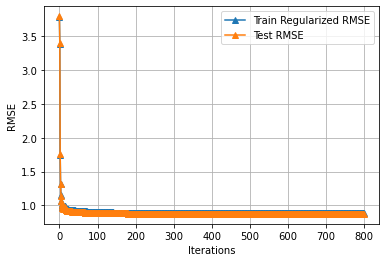

In [55]:
plt.plot(loss_history_train, "-^", label=f"Train Regularized RMSE")
plt.plot(loss_history_test, "-^", label=f"Test RMSE")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.grid(True)

In [ ]:
_ = plt.hist( ((U @ V)[test_u.astype(int), test_m.astype(int)]), bins=100)